In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [24]:
# # some nice config things that are not required
# %config InlineBackend.figure_format = 'retina'
# import matplotlib as mpl
# # mpl.rcParams

## Load in the data

Saved as `*.npy` files which are numpy binaries of arrays. Load them using numpy `load`. Documentation for numpy can be found [here](https://numpy.org/).

In [29]:
fr = 6 # frame rate is approximately 6 Hz

In [2]:
traces =  np.load('./data/traces.npy')
trialwise = np.load('./data/trialwise.npy')

Trial lables were saved as a `pickle` file, which is a generic python binary. The trial labels are saved as lists in a dictionary. Open it, then convert it to numpy arrays.

In [16]:
with open('./data/trial_labels.pickle', 'rb') as f:
    labels = pickle.load(f)

In [17]:
labels.keys()

dict_keys(['ori', 'size', 'contrast'])

In [18]:
for key,value in labels.items():
    labels[key] = np.array(value)

In [19]:
labels

{'ori': array([270, 330, 300,  -1, 180,  30, 210,  30, 300,  90, 150, 240, 330,
        150,  30, 150,  -1, 330,  30, 330, 240, 150,   0, 270, 240, 210,
        120, 120, 180,   0, 150,  90, 150, 300, 330, 270, 180, 120, 150,
        210,   0, 120, 270, 300, 150,  60,  90, 150,   0,  -1, 180, 180,
        300, 120, 210,   0, 180, 120,  60, 240, 330, 270,  -1,   0, 120,
         90, 150,  30,  30,  60, 240,  90,  30, 150,  30,  60, 330, 300,
          0, 180, 270,  60, 270, 240,  60,  -1, 180, 150, 120,  -1, 150,
        150,   0, 330, 180, 210,  -1, 240,   0,  30,   0, 300,  -1, 180,
        210, 240,  60, 270, 150, 240,  30, 240,  30, 270,  -1, 300,   0,
          0,  30,   0,  90, 120, 150,   0, 300, 330, 210, 180, 210,  30,
         60,  90, 270,  -1, 180, 330,  90,  60, 240, 180, 210, 330, 270,
         30,   0,  90, 330, 270, 180,   0, 300,   0,  60, 120, 210,  -1,
         30,  30,   0, 330,   0,  60, 180,  -1,  -1, 270, 240, 240, 330,
         60, 300, 180, 300, 210, 240, 240,  

## Explore the data

`traces`: a cell x frame array of ∆F/F extracted data.

`trialwise`: a trial x cell x time array of ∆F/F extracted data.

In [14]:
traces.shape

(980, 10525)

In [15]:
trialwise.shape

(329, 980, 31)

In [20]:
labels['ori'].shape

(329,)

Plot some of the data with `matplotlib`- a very simple plotting interface. Find the documentation [here](https://matplotlib.org/).

Don't worry to much about the details yet. Just get a sense for what the data looks like.

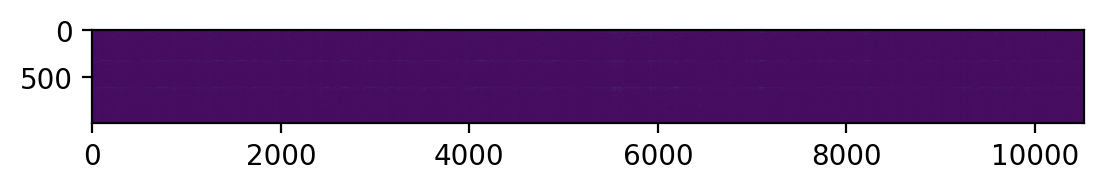

In [25]:
plt.imshow(traces)

That looks weird... why can't I see anything?

When you call `plt.imshow()` it automatically scales the colors from min to max, so if there's one really bright pixel, we won't be able to see anything near the mean.

So first, try plotting a single cell to see what it looks like... To do this you will need to 'index' or 'slice' the array. In Python, indexing starts at 0. `:` is used to signify all values. Square brackets enable indexing.

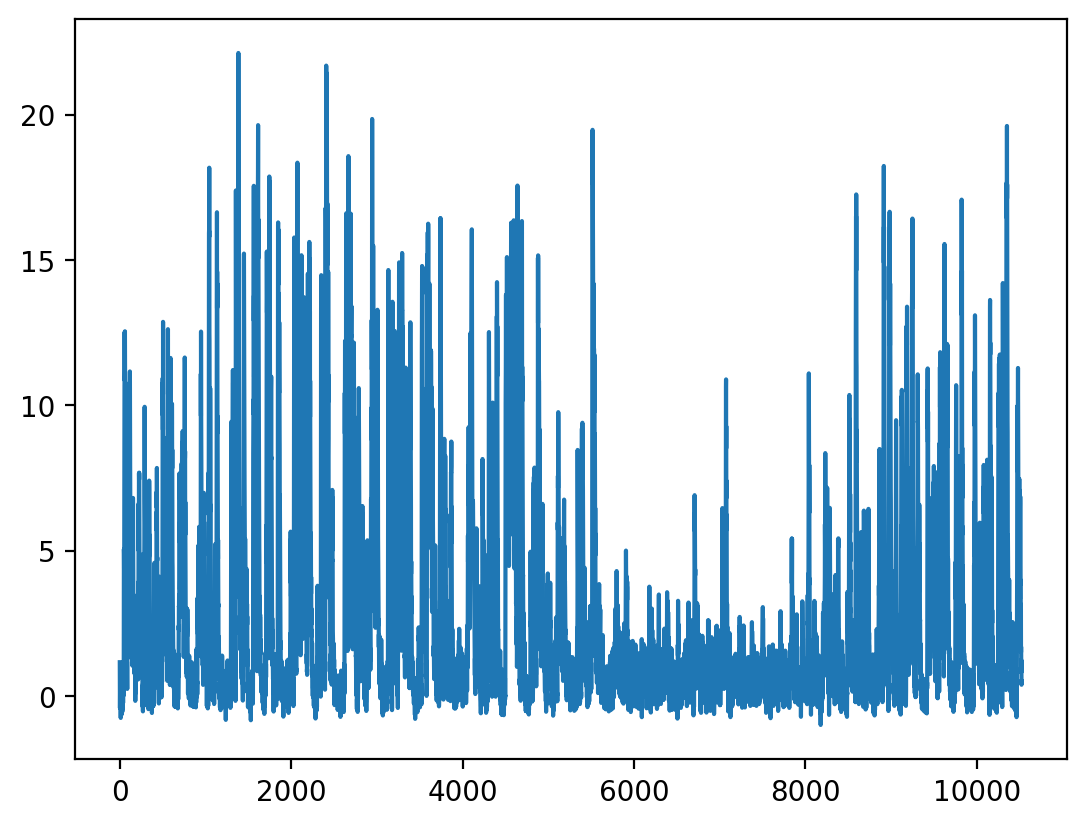

In [26]:
plt.plot(traces[0,:])

The colon can be used to slice data from x to y, also.

Syntax for slicing is: `start:stop`, where stop is exclusive. So if you wanted to slice out the ∆F/F activity of cell 0 for the first 500 frames: `traces[0,:500]` because remember indexing starts a 0 and the stop point is exclusive.

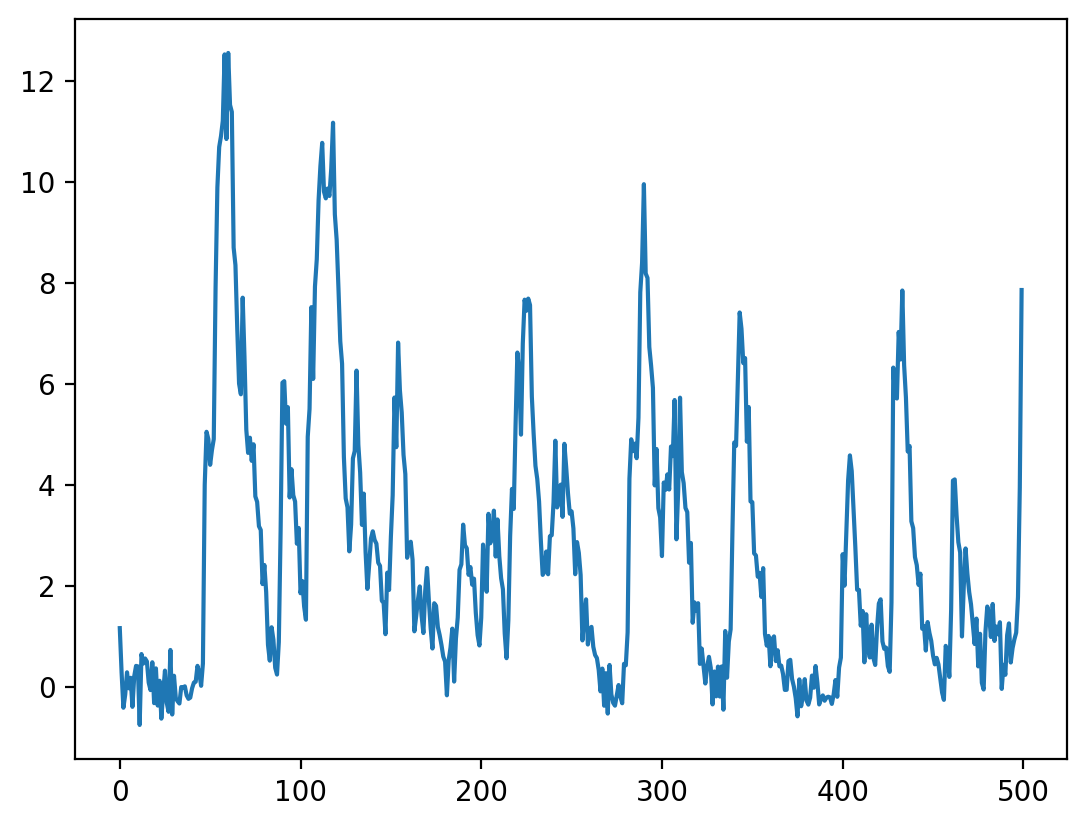

In [28]:
plt.plot(traces[0,:500])

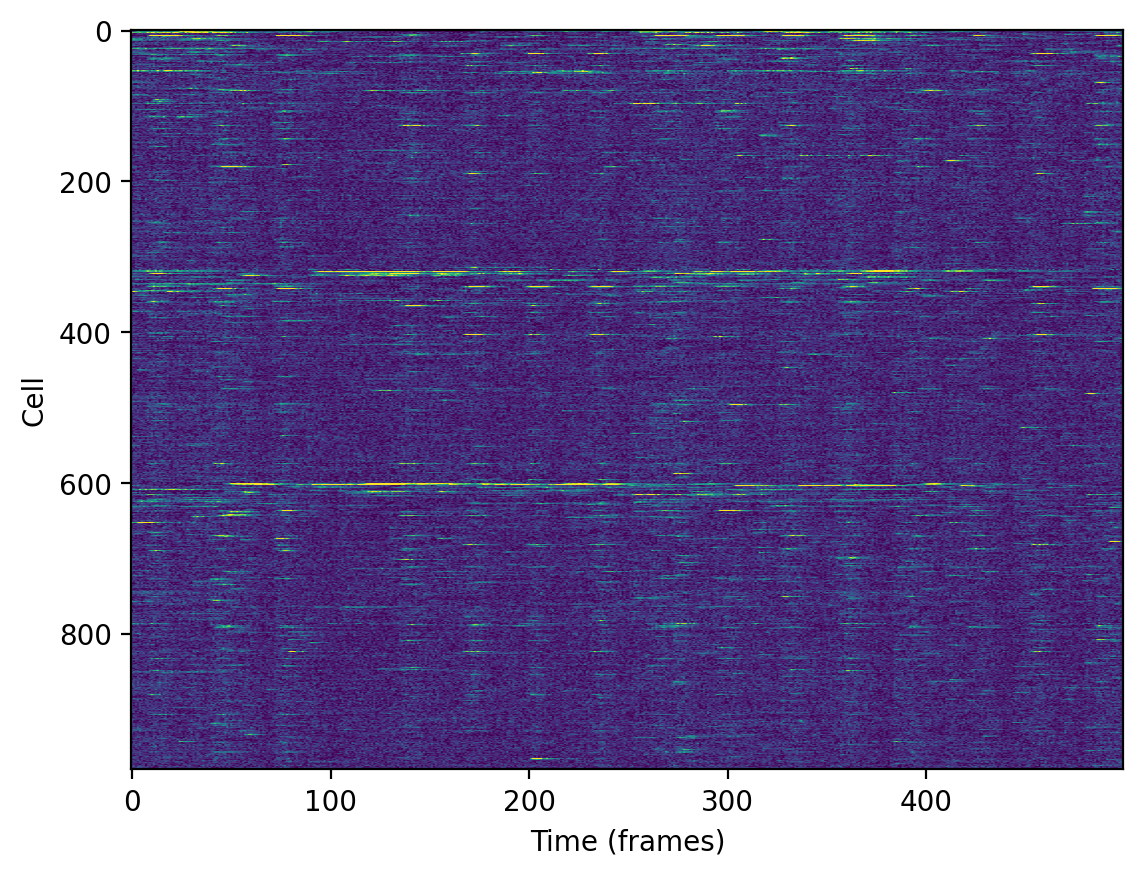

In [31]:
plt.imshow(traces[:,:500], aspect='auto', vmin=0, vmax=5)
plt.ylabel('Cell')
plt.xlabel('Time (frames)')
plt.show()